# Data Mining Project - Analysis and Knowledge Discovery from Cricket Data <br>

<center> Vaishnavi S - 18MIS1029 <br>
Balaji Chandramouli - 18MIS1059 <br> </center>

<b> 1. Classification of the label 'winner' of the match using various features like teams, venue, toss, decision and post conditions like runs, wickets using three algorithms - Naive Bayes, Decision Tree and Random Forest. </b> 

<b> Importing libraries and dataset </b>

In [1]:
import pandas as pd
import io
from io import StringIO
from sklearn.model_selection import train_test_split

In [2]:
dm=pd.read_csv('matches.csv')
dm.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,venue,umpire1
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar
1,2017,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Rising Pune Supergiants,0,7,Maharashtra Cricket Association Stadium,A Nand Kishore
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,Saurashtra Cricket Association Stadium,Nitin Menon
3,2017,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,Holkar Cricket Stadium,AK Chaudhary
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium,NaN


<b> Preprocessing </b>

In [3]:
dm1 = dm[['season','venue','team1','team2','toss_winner','toss_decision','win_by_runs','win_by_wickets','winner']]

In [4]:
dm1.head()

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,35,0,Sunrisers Hyderabad
1,2017,Maharashtra Cricket Association Stadium,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,0,7,Rising Pune Supergiants
2,2017,Saurashtra Cricket Association Stadium,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,10,Kolkata Knight Riders
3,2017,Holkar Cricket Stadium,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,0,6,Kings XI Punjab
4,2017,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,15,0,Royal Challengers Bangalore


In [5]:
clsnm = dm1.team1.unique()
print(clsnm)

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']


In [6]:
dm1.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','SRH','CSK','RR','DC','GL','KXIP','SRH','RPS','RPS','KTK','PW','DC'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
dm1.replace(encode, inplace=True)

c:\users\balaji\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\users\balaji\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [7]:
dm1.team1.unique()

array([10,  1,  8, 11,  3,  2,  4,  9,  5,  6, 12, 13], dtype=int64)

In [8]:
dm1.head()

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,"Rajiv Gandhi International Stadium, Uppal",10,3,3,field,35,0,10
1,2017,Maharashtra Cricket Association Stadium,1,11,11,field,0,7,11
2,2017,Saurashtra Cricket Association Stadium,8,2,2,field,0,10,2
3,2017,Holkar Cricket Stadium,11,9,9,field,0,6,9
4,2017,M Chinnaswamy Stadium,3,4,3,bat,15,0,3


In [9]:
dm1['toss_decision'] = dm1.apply(lambda x: x['toss_winner']*-1 if x['toss_decision']=='field' else x['toss_winner'], axis=1)

<ipython-input-9-aa5fd2c03ff3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm1['toss_decision'] = dm1.apply(lambda x: x['toss_winner']*-1 if x['toss_decision']=='field' else x['toss_winner'], axis=1)


In [10]:
encode1 = {'result': {'runs':1,'wickets':0}}
dm1.replace(encode1, inplace=True)

In [11]:
dm1.head()

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,"Rajiv Gandhi International Stadium, Uppal",10,3,3,-3,35,0,10
1,2017,Maharashtra Cricket Association Stadium,1,11,11,-11,0,7,11
2,2017,Saurashtra Cricket Association Stadium,8,2,2,-2,0,10,2
3,2017,Holkar Cricket Stadium,11,9,9,-9,0,6,9
4,2017,M Chinnaswamy Stadium,3,4,3,3,15,0,3


In [12]:
from sklearn.preprocessing import LabelEncoder
var = ['venue']
le = LabelEncoder()
for i in var:
    dm1[i] = le.fit_transform(dm1[i])


<ipython-input-12-04f1e83f4336>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm1[i] = le.fit_transform(dm1[i])


In [13]:
dm1.head(3)

,season,venue,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,winner
0,2017,23,10,3,3,-3,35,0,10
1,2017,16,1,11,11,-11,0,7,11
2,2017,25,8,2,2,-2,0,10,2


In [14]:
x = dm1.iloc[:,0:8]
y = dm1.winner

In [15]:
x.dtypes

season            int64
venue             int32
team1             int64
team2             int64
toss_winner       int64
toss_decision     int64
win_by_runs       int64
win_by_wickets    int64
dtype: object

<b> Naive Bayes Classification </b>

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(x_train, y_train)
print(model.score(x_train,y_train)*100)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

32.08661417322835
Accuracy: 25.78125


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.40      0.36        15
           2       0.12      0.25      0.17        12
           3       0.25      0.06      0.09        18
           4       0.14      0.14      0.14         7
           5       0.50      0.38      0.43        16
           6       0.46      0.43      0.44        14
           8       0.22      1.00      0.36         2
           9       1.00      0.08      0.15        25
          10       0.21      0.31      0.25        13
          11       0.00      0.00      0.00         1
          12       0.17      1.00      0.29         2
          13       0.00      0.00      0.00         3

    accuracy                           0.26       128
   macro avg       0.28      0.34      0.22       128
weighted avg       0.43      0.26      0.25       128



<b> Decision Tree Classification </b>

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [21]:
x = dm1.iloc[:,0:8]
y = dm1.winner

In [22]:
feature_cols = ['season', 'venue', 'team1', 'team2','toss_winner','toss_decision','win_by_runs','win_by_wickets']
classns = ['10',  '1',  '8', '11',  '3',  '2',  '4',  '9',  '5',  '6', '12', '13'] 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [346]:
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=classns,
                   filled=True)


In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(clf.score(X_train,y_train)*100)

Accuracy: 50.78125
100.0


In [430]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76        15
           2       0.57      0.67      0.62        12
           3       0.75      0.50      0.60        18
           4       0.36      0.71      0.48         7
           5       0.46      0.75      0.57        16
           6       0.60      0.43      0.50        14
           8       0.67      1.00      0.80         2
           9       0.71      0.40      0.51        25
          10       0.44      0.54      0.48        13
          11       0.00      0.00      0.00         1
          12       0.67      1.00      0.80         2
          13       0.00      0.00      0.00         3

    accuracy                           0.56       128
   macro avg       0.50      0.56      0.51       128
weighted avg       0.60      0.56      0.56       128



<b> Random Forest Classification </b>

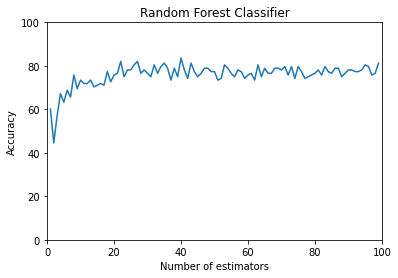

Maximum Accuracy: 83.59375  at number of estimators =  40
Minimum Accuracy: 44.53125  at number of estimators =  2
Average Accuracy: 74.9921875


In [431]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
xp =[]
yp =[]
maxp = 0
minp = 100
nM = 1
nm = 1
aa = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
for i in range (1,100):
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    p = metrics.accuracy_score(y_test, y_pred)
    if p*100 > maxp:
        maxp = p*100
        nM = i
    if p*100 < minp:
        minp = p*100
        nm = i
    xp.append(i)
    yp.append(p*100)
    aa = aa + p*100
plt.plot(xp, yp)
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier')
plt.show()
print("Maximum Accuracy:",maxp," at number of estimators = ",nM)
print("Minimum Accuracy:",minp," at number of estimators = ",nm)
print("Average Accuracy:",aa/100)



<b> 2. Calculate the probability of chasing down a specific score at a specific venue (Mumbai) using Logistic Regression. </b>

<br>
<b> Import data and preprocessing </b>

In [27]:
bb = pd.read_csv('iplbbb.csv', low_memory=False)

In [28]:
bb.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
bb = bb.drop(['start_date', 'ball','striker','non_striker','bowler','wides','noballs','legbyes','byes','penalty','wicket_type','player_dismissed','other_wicket_type','other_player_dismissed'], axis=1)

In [30]:
bb.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Eden Gardens', 'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [31]:
bb = bb[(bb.venue == 'Wankhede Stadium')]

In [32]:
bb

,match_id,season,venue,innings,batting_team,bowling_team,runs_off_bat,extras
932,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,0,0
933,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,4,0
934,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,0,0
935,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,0,0
936,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,4,0
...,...,...,...,...,...,...,...,...
178078,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,0,0
178079,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,4,0
178080,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,1,0
178081,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,1,0


In [33]:
bb['runs'] = bb.apply(lambda x: x['runs_off_bat'] + x['extras'], axis=1)

In [34]:
bb

,match_id,season,venue,innings,batting_team,bowling_team,runs_off_bat,extras,runs
932,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,0,0,0
933,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,4,0,4
934,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,0,0,0
935,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,0,0,0
936,335985,2007/08,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,4,0,4
...,...,...,...,...,...,...,...,...,...
178078,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,0,0,0
178079,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,4,0,4
178080,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,1,0,1
178081,1178431,2019,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,1,0,1


In [35]:
bb[(bb.extras >0) & (bb.runs_off_bat >0)]

,match_id,season,venue,innings,batting_team,bowling_team,runs_off_bat,extras,runs
8850,336021,2007/08,Wankhede Stadium,2,Mumbai Indians,Kolkata Knight Riders,6,1,7
10356,336028,2007/08,Wankhede Stadium,2,Mumbai Indians,Kings XI Punjab,6,1,7
46111,501218,2011,Wankhede Stadium,1,Pune Warriors,Mumbai Indians,1,1,2
46112,501218,2011,Wankhede Stadium,1,Pune Warriors,Mumbai Indians,1,1,2
47245,501221,2011,Wankhede Stadium,2,Chennai Super Kings,Mumbai Indians,1,1,2
52992,501246,2011,Wankhede Stadium,2,Delhi Daredevils,Mumbai Indians,1,1,2
53005,501246,2011,Wankhede Stadium,2,Delhi Daredevils,Mumbai Indians,4,1,5
57826,501268,2011,Wankhede Stadium,2,Chennai Super Kings,Royal Challengers Bangalore,1,1,2
71018,548360,2012,Wankhede Stadium,2,Royal Challengers Bangalore,Mumbai Indians,6,1,7
73574,548370,2012,Wankhede Stadium,1,Kolkata Knight Riders,Mumbai Indians,1,1,2


In [36]:
bb = bb.drop(['runs_off_bat','extras'],axis=1)

In [37]:
bb.dtypes

match_id         int64
season          object
venue           object
innings          int64
batting_team    object
bowling_team    object
runs             int64
dtype: object

In [38]:
bb.season.unique()

array(['2007/08', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2019', '2018'], dtype=object)

In [39]:
bb = bb[(bb.season!='2007/08')]

In [40]:
bb = bb[(bb.innings <3)]

In [41]:
a = bb.groupby(['match_id','innings']).sum()

In [42]:
b = a.reset_index()

In [43]:
table = pd.pivot_table(b, values = 'runs' ,index = ['match_id'],columns=['innings'])

In [543]:
bb.to_csv('file.csv')

In [44]:
c = pd.read_csv('file1.csv')

In [45]:
c.dtypes

1        int64
chase    int64
dtype: object

In [46]:
c

,1,chase
0,182,1
1,118,1
2,164,0
3,159,0
4,178,0
...,...,...
62,197,1
63,187,1
64,171,1
65,162,0


<b> Logistic Regression </b>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
x = c['1']
y = c['chase']

Text(0, 0.5, 'Score')

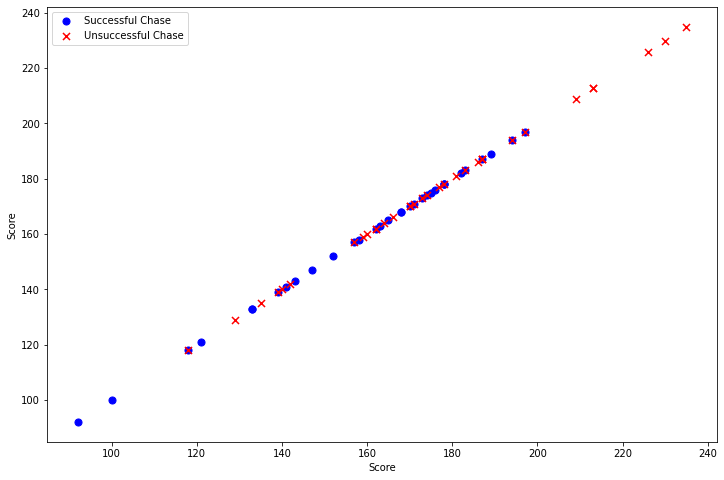

In [49]:
ychase = c[c['chase'].isin([1])]
nchase = c[c['chase'].isin([0])]


fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(ychase['1'], ychase['1'], s=50, c='b', marker='o', label='Successful Chase')
ax.scatter(nchase['1'], nchase['1'], s=50, c='r', marker='x', label='Unsuccessful Chase')
ax.legend()
ax.set_xlabel('Score')
ax.set_ylabel('Score')

In [50]:
x.to_numpy()
x = x.values.reshape(-1,1)

In [51]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [53]:
y_pred = classifier.predict(x_test)

In [54]:
print ("Accuracy : ", accuracy_score(y_pred, y_test)*100)
print(classifier.score(x_train,y_train)*100)

Accuracy :  57.14285714285714
54.71698113207547


In [555]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[3 4]
 [5 2]]


In [556]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.50      0.50      0.50         6

    accuracy                           0.57        14
   macro avg       0.56      0.56      0.56        14
weighted avg       0.57      0.57      0.57        14



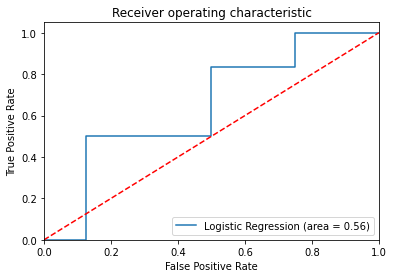

In [557]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [568]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.691210
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  chase   No. Observations:                   67
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            0
Date:                Wed, 26 May 2021   Pseudo R-squ.:                0.002634
Time:                        14:52:19   Log-Likelihood:                -46.311
converged:                       True   LL-Null:                       -46.433
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0007      0.001     -0.509      0.611      -0.004       0.002


In [569]:
print(classifier.coef_, classifier.intercept_)

[[-0.02182221]] [3.65997602]


In [583]:
a = classifier.coef_[0]
b = classifier.intercept_[0]

In [584]:
import math
def sigmoid(z):
    return math.exp(b + z*a) / (1 + math.exp(b + z*a))

In [585]:
sigmoid(140)

0.6467688137770363

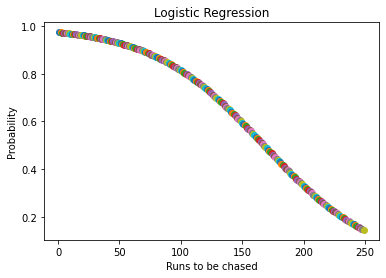

In [591]:
for i in range(1,250):
    plt.scatter(i,sigmoid(i))

plt.xlabel('Runs to be chased')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.show()

In [588]:
def odds(n):
    return sigmoid(n)/(1-sigmoid(n))

In [616]:
n = 120
print("Score"+"\t"+"Probability"+"\t"+"Odds"+"\t"+"% increase wrt 120")
for i in range(n,250,10):
    print(i,"\t",round(sigmoid(i),2),"\t\t",round(odds(i),2),"\t\t",round(100*((odds(n)/odds(i))-1),2),"%")

Score	Probability	Odds	% increase wrt 120
120 	 0.74 		 2.83 		 0.0 %
130 	 0.69 		 2.28 		 24.39 %
140 	 0.65 		 1.83 		 54.72 %
150 	 0.6 		 1.47 		 92.45 %
160 	 0.54 		 1.18 		 139.38 %
170 	 0.49 		 0.95 		 197.76 %
180 	 0.43 		 0.76 		 270.37 %
190 	 0.38 		 0.61 		 360.69 %
200 	 0.33 		 0.49 		 473.04 %
210 	 0.28 		 0.4 		 612.78 %
220 	 0.24 		 0.32 		 786.6 %
230 	 0.2 		 0.26 		 1002.81 %
240 	 0.17 		 0.21 		 1271.74 %
